In [3]:
import numpy as np
import matplotlib.pyplot as plt

Initial mastery: 0.01
[0.01, 0.15114324142568927, 0.16971160667070795, 0.17255083547329456, 0.5144855931476879, 0.2552283944200064, 0.1871415103459382, 0.5352182004578582, 0.8348093628348406, 0.9557130265776226]


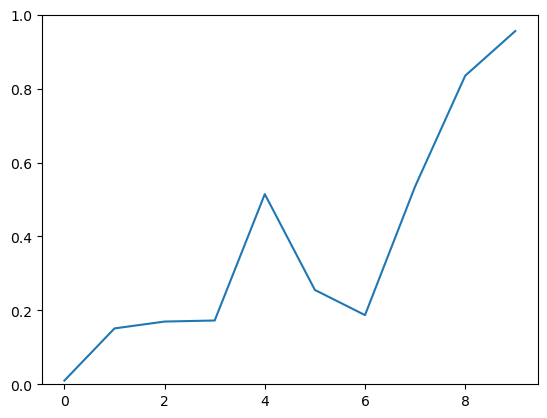

In [18]:
class BayesianKnowledgeTracer:
    def __init__(self, p_l0, p_t, p_g, p_s, forgetting_lambda=0.099):
        """
        Parameters:
        - P_L0 : float, prior knowledge probability
        - P_T  : float, transition (learning) probability
        - P_G  : float, guess probability
        - P_S  : float, slip probability
        - forgetting_lambda : float, decay constant for a forgetting curve
        """
        assert p_l0 != 0
        self.p_l = p_l0
        self.p_t = p_t
        self.p_g = p_g
        self.p_s = p_s
        self.forgetting_lambda = forgetting_lambda

    def update(self, correct: bool):
        if correct:
            # Bayes update if Chloe answer correctly
            numerator = self.p_l * (1 - self.p_s)
            denominator = numerator + (1 - self.p_l) * self.p_g
        else:
            # Bayes update if Chloe answer incorrectly
            numerator = self.p_l * self.p_s
            denominator = numerator + (1 - self.p_l) * (1 - self.p_g)
        if denominator == 0:
            posterior = self.p_l
        else:
            posterior = numerator / denominator

        # Incorporate learning(transition learning)
        self.p_l = posterior + (1 - posterior) * self.p_t
        return self.p_l

    def apply_forgetting(self, delta_t_days: float):
        decay = np.exp(-self.forgetting_lambda * delta_t_days)
        self.p_l *= decay
        return self.p_l


In [26]:
# --- Simulation ---
P_L0 = 0.1  # prior knowledge
P_T = 0.1    # transition (learning) probability
P_G = 0.25   # guess probability
P_S = 0.1    # slip probability
answers = [True, False, True, False, True, True, True]

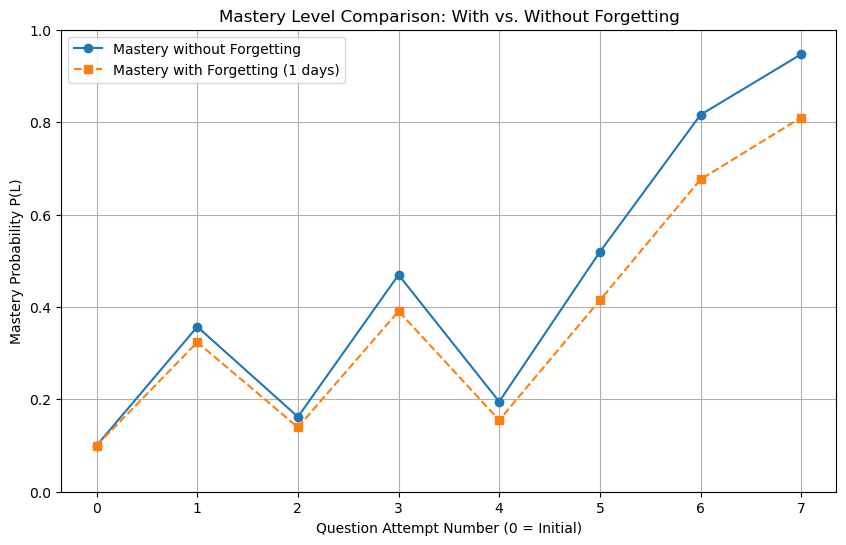

In [27]:
# --- Simulation 1: No Forgetting ---
tracer_no_forget = BayesianKnowledgeTracer(P_L0, P_T, P_G, P_S)
levels_no_forget = [tracer_no_forget.p_l]
for answer in answers:
    mastery_level = tracer_no_forget.update(answer)
    levels_no_forget.append(mastery_level)

# --- Simulation 2: With Forgetting ---
tracer_with_forget = BayesianKnowledgeTracer(P_L0, P_T, P_G, P_S)
levels_with_forget = [tracer_with_forget.p_l]
delta_t_days = 1  # Assume 2 days pass between each question

for answer in answers:
    tracer_with_forget.update(answer) # First, update based on the answer
    mastery_after_forgetting = tracer_with_forget.apply_forgetting(delta_t_days) # Then, apply forgetting
    levels_with_forget.append(mastery_after_forgetting)

# print("Levels (No Forgetting):", [round(l, 4) for l in levels_no_forget])
# print("Levels (With Forgetting):", [round(l, 4) for l in levels_with_forget])

# --- Plotting Both Results ---
plt.figure(figsize=(10, 6))
# Plot the original line
plt.plot(range(len(levels_no_forget)), levels_no_forget, marker='o', linestyle='-', label='Mastery without Forgetting')
# Plot the new line with forgetting
plt.plot(range(len(levels_with_forget)), levels_with_forget, marker='s', linestyle='--', label=f'Mastery with Forgetting ({delta_t_days} days)')

plt.title("Mastery Level Comparison: With vs. Without Forgetting")
plt.xlabel("Question Attempt Number (0 = Initial)")
plt.ylabel("Mastery Probability P(L)")
plt.xticks(range(len(levels_no_forget)))
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()